Пример программы Python для семантической сегментации изображения с использованием предварительно обученной модели. Программа захватывает изображение, выполняет семантическую сегментацию и выводит результат в консоль. Давайте пройдемся по коду с подробными пояснениями:

Во-первых, мы импортируем необходимые библиотеки: numpy для числовых операций, matplotlib.pyplot для построения изображений, torch для работы с PyTorch, torchvision.transforms для преобразования изображений и PIL.Image для загрузки изображений.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models.segmentation import deeplabv3_resnet50

In [ ]:
# Загрузите предварительно обученную модель
model = deeplabv3_resnet50(pretrained=True)

In [ ]:
# Установите модель в режим оценки
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# Определить преобразование изображения
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Захват изображения
image_path = "image.jpg"
image = Image.open(image_path)

In [ ]:
# Примените преобразование к изображению
input_tensor = transform(image).unsqueeze(0)

In [ ]:
# Выполнение семантической сегментации
with torch.no_grad():
    output = model(input_tensor)['out'][0]
    predicted_labels = torch.argmax(output, dim=0).cpu().numpy()

(-0.5, 1279.5, 839.5, -0.5)

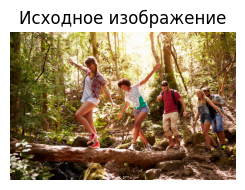

In [ ]:
# Отображение исходных и сегментированных изображений
plt.subplot(1, 2, 1)
plt.title("Исходное изображение")
plt.imshow(image)
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

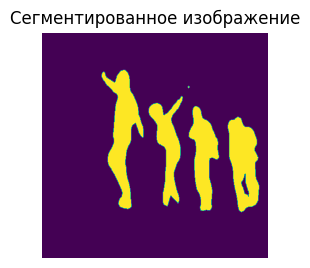

In [ ]:
plt.subplot(1, 2, 2)
plt.title("Сегментированное изображение")
plt.imshow(predicted_labels)
plt.axis("off")

In [ ]:
# Показать графики
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**Теперь давайте подробно разберем каждую команду:**

1. Во-первых, мы импортируем необходимые библиотеки: numpy для числовых операций, matplotlib.pyplot для построения изображений, torch для работы с PyTorch, torchvision.transforms для преобразования изображений и PIL.Image для загрузки изображения.

2. Мы импортируем предварительно обученную модель DeepLabV3, в частности вариант deeplabv3_resnet50, из torchvision.models.segmentation.

3. Мы создаем экземпляр предварительно обученной модели, используя deeplabv3_resnet50(pretrained=True) и сохраняем его в переменной модели.

4. Мы устанавливаем модель в режим оценки, используя model.eval(). Это гарантирует, что модель не обучается, а все слои пакетной нормализации или выпадающие слои работают в режиме оценки.

5. Мы определяем конвейер преобразования изображения с помощью transforms.Compose(). В этом примере конвейер состоит из изменения размера изображения до (512, 512) пикселей, преобразования его в тензор и нормализации его значений с использованием среднего значения и стандартного отклонения, представленных в документе DeepLabV3.

6. Указываем путь к файлу изображения, которое хотим сегментировать.

7. Мы используем функцию Image.open() из PIL, чтобы загрузить изображение и сохранить его в переменной изображения.

8. Мы применяем определенный конвейер преобразования к изображению с помощью transform(image), который изменяет размер, преобразует и нормализует изображение.

9. Мы добавляем к тензору дополнительное измерение, используя unsqueeze(0), чтобы создать пакет размером 1. Модель ожидает ввода в пакетном формате даже для одного изображения.

10. Мы выполняем семантическую сегментацию входного тензора, используя предварительно обученную модель. Мы передаем тензор через модель, используя model(input_tensor)['out'][0], где input_tensor — преобразованный тензор входного изображения. Результирующий выходной тензор содержит предсказанные метки для каждого пикселя.

11. Мы используем torch.argmax(), чтобы найти индекс максимального значения по измерению канала (предсказания класса) для каждого пикселя, в результате чего